# Aluno: Clésio de Araújo Gonçalves

Equação: 
$$s_k = \frac{L-1}{M N} \sum_{j=0}^{k} n_j$$

sendo k = 0, 1, 2 ... L - 1.

# Atividade: 

## Faça uma função para a equalização do histograma de uma imagem implementando a equação explicada acima

In [1]:
# Imports
import numpy as np
from skimage.io import imread, imsave, imshow
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.exposure import histogram
from skimage.exposure import equalize_hist
from scipy.stats import kurtosis
import math
import glob as g

In [2]:
claro = imread("picos_claro.jpg")

In [3]:
# converte a imagem em array numpy
img = np.asarray(claro)

# pixels em matriz 1D
flat = img.flatten()

In [4]:
# função de histograma
def get_histogram(image, bins):
    # array com tamanho de bins, definido como zeros
    histogram = np.zeros(bins)
    
    # percorrer os pixels e somar contagens de pixels
    for pixel in image:
        histogram[pixel] += 1
    
    # retorna o resultado final
    return histogram

# executa a função de histograma
hist = get_histogram(flat, 256)

In [5]:
# função de soma cumulativa
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# executa a funcao
cs = cumsum(hist)

In [6]:
# numerador e denominador
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()

# re-normalize a cumsum
cs = nj / N

# convertendo para uint8
cs = cs.astype('uint8')

In [7]:
# obtenha o valor da soma cumulativa para cada índice em flat e defina-o como img_new
img_new = cs[flat]

# colocar a matriz de volta na forma original
img_new = np.reshape(img_new, img.shape)

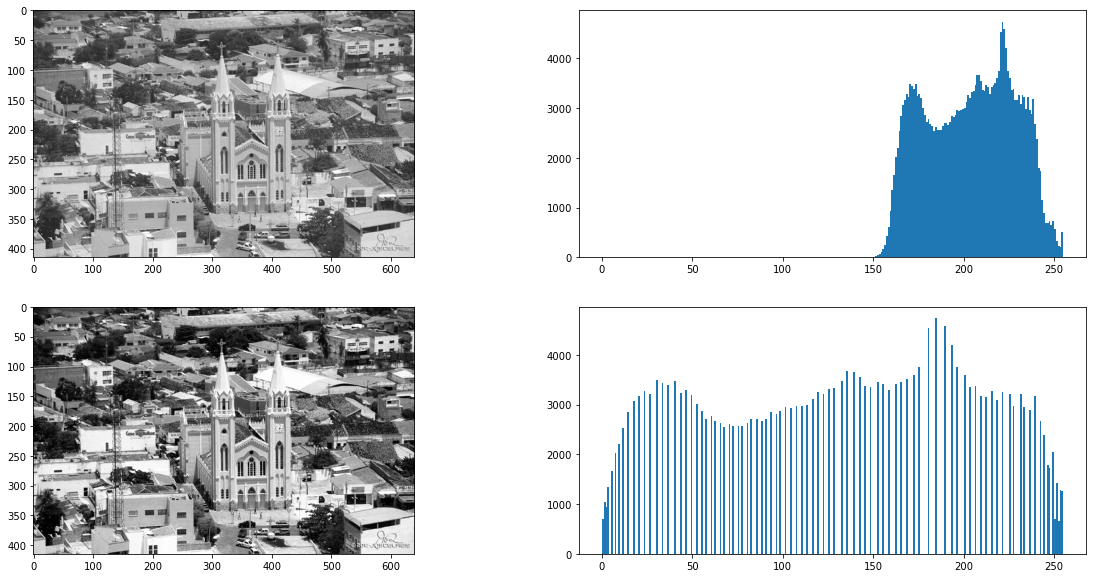

In [8]:
# exibe a nova imagem
fig, ax = plt.subplots(2,2,figsize=(20,10))
ax[0,0].imshow(img,cmap='gray')
ax[1,0].imshow(img_new,cmap='gray')
ax[0,1].hist(img.ravel(),range(256))
ax[1,1].hist(img_new.ravel(),range(256))
plt.show()

### Atributos de Textura de 1$^a$ ordem

Os seguintes valores são calculado com o histograma e são largamente utilizados para representar imagens:
- Média
- Variância
- Skewness
- Kurtosis
- Energia
- Entropia

# Atividade: 

## Pequise como são calculados esses valores e implemente o cálculo desses atributos para as imagens utilizadas nessa aula.

In [9]:
def energy_hist(hist):
    soma = 0
    for i in hist:
        soma += i*i
    return soma
        
def entropy_hist(hist):
    soma = 0
    for i in hist:
        if(i == 0):
            continue
        soma += (i*(math.log2(i)))
    return soma*-1

def skew(hist):
    soma = 0
    for i in range(len(hist)):
        soma += ((i - hist.mean())**3)*hist[i]
    dp = hist.std()**3
    return ((1/dp)*soma)

def descritor_histograma(imagem):
    hist = histogram(imagem,nbins=256)
    features = []
    features.append(hist[1].mean())
    features.append(hist[1].var())
    features.append(skew(hist[1]))
    features.append(kurtosis(hist[1]))
    features.append(energy_hist(hist[1]))
    features.append(entropy_hist(hist[1]))
    
    return features

In [10]:
macas = g.glob('imagens/macas/*')
tomates = g.glob('imagens/tomates/*')

features_macas = []
features_tomates = []

for i in macas:
    imagem = imread(i)
    img = rgb2gray(imagem)
    features = descritor_histograma(img)
    features_macas.append(features)
    
for i in tomates:
    imagem = imread(i)
    img = rgb2gray(imagem)
    features = descritor_histograma(img)
    features_tomates.append(features)

In [11]:
listaMedia = []
listaVar = []
listaSkew = []
listaKurtosis = []
listaEnergy = []
listaEntropy = []
labels = []

for i in features_macas:
    listaMedia.append(i[0])
    listaVar.append(i[1])
    listaSkew.append(i[2])
    listaKurtosis.append(i[3])
    listaEnergy.append(i[4])
    listaEntropy.append(i[5])
    labels.append(0)
    
for i in features_tomates:
    listaMedia.append(i[0])
    listaVar.append(i[1])
    listaSkew.append(i[2])
    listaKurtosis.append(i[3])
    listaEnergy.append(i[4])
    listaEntropy.append(i[5])
    labels.append(1)

In [12]:
tudo = []
nomes = ['Média', 'Variância', 'Skewness', 'Kurtosis', 'Energy', 'Entropy']
tudo.append(listaMedia)
tudo.append(listaVar)
tudo.append(listaSkew)
tudo.append(listaKurtosis)
tudo.append(listaEnergy)
tudo.append(listaEntropy)

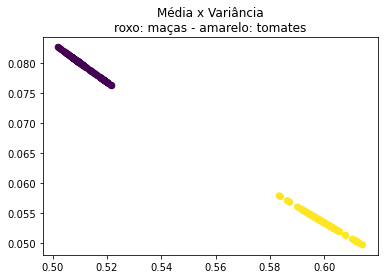

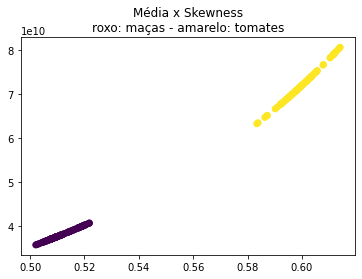

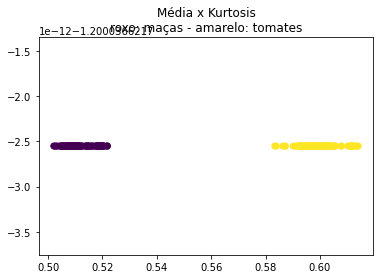

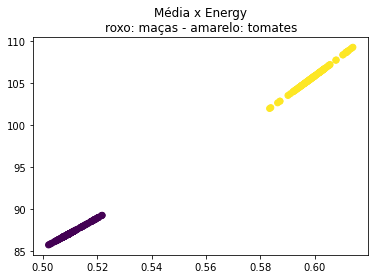

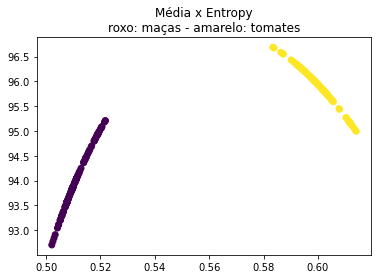

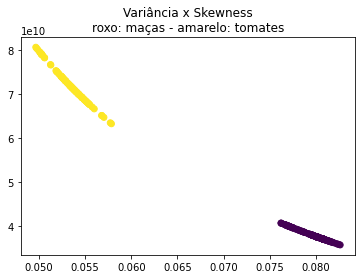

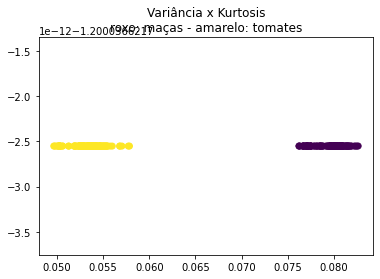

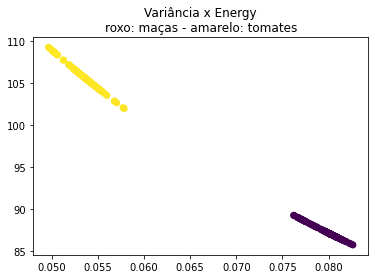

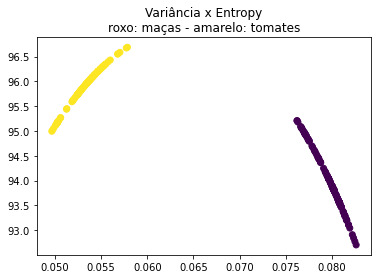

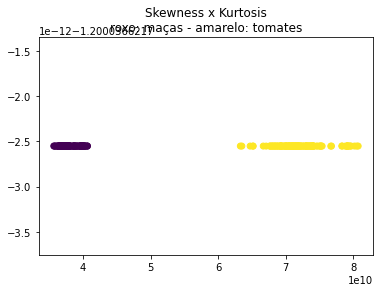

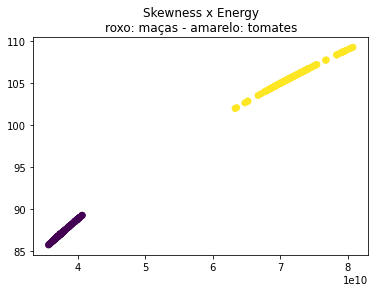

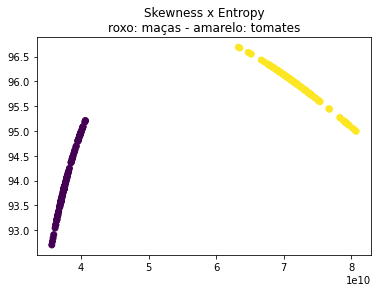

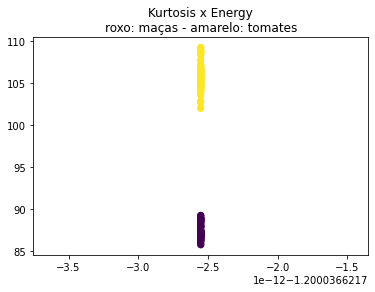

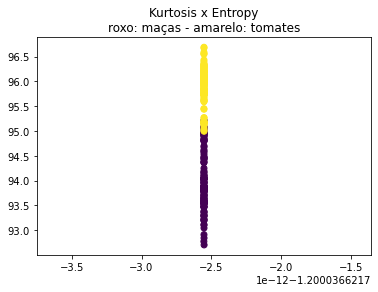

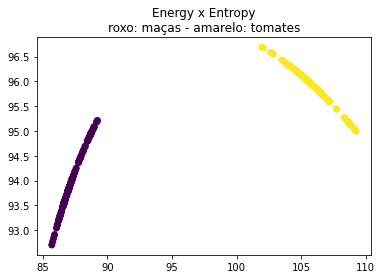

In [13]:
for i in range(len(tudo)):
    for j in range(i+1,len(tudo)):
        plt.figure()
        plt.title(nomes[i] + " x " + nomes[j] + "\nroxo: maças - amarelo: tomates")
        plt.scatter(tudo[i], tudo[j], c=labels)